Here's what you need to know to get started:

short version: There is KMeans and KMeans Minibatch. KMeans Minibatch is faster, use that. KMeans++ is a default input parameter for both and is optimal for good clustering.

long version: We use KMeans as opposed to Mean Shift cause it runs faster. KMeans in Big O is O(kN) while Meanshift is is O(kN^2). There is a good picture on Wiki that shows how Kmeans works. It uses Voronoi tesselations and is an iterative process. KMeans++ ensures that the initial points chosen for Kmeans(Minibatch or not) are far apart which is good cause randomly chosen points can be close together (bad for clustering purposes).

In [8]:
import sys
sys.path.append("..") # lets you import from outer folder
from search import search_local # imports module within search folder
samples = search_local.search_phase_space(0, 0, 0, 0, 0, 0, epsilon = 0.3, v_scale = 0.1)
len(samples)

207

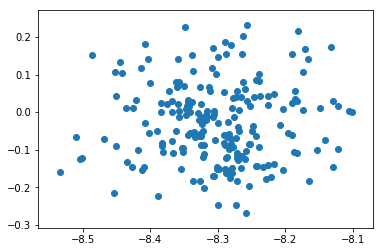

In [9]:
import matplotlib.pyplot as plt
plt.scatter(samples[:,0], samples[:,1])
plt.show()

In [10]:
#lets try minibatchkmeans woohoo!
from sklearn.cluster import MiniBatchKMeans

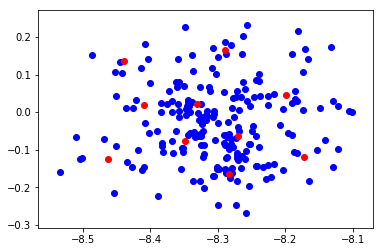

96.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
%%timeit -n1 -r1
my_kmeans = MiniBatchKMeans(n_clusters = 10)
my_kmeans.fit(samples[:, :2])

plt.scatter(samples[:,0], samples[:,1], c = 'blue')
plt.scatter(my_kmeans.cluster_centers_[:, 0],
            my_kmeans.cluster_centers_[:, 1], c = 'red')
plt.show()

In [19]:
my_kmeans.labels_

NameError: name 'my_kmeans' is not defined

In [17]:
import numpy as np
cmap = plt.get_cmap("rainbow")
colours = cmap(np.linspace(1, 0, 10))

plt.scatter(samples[:,0], samples[:,1], c = colours[my_kmeans.labels_])
plt.scatter(my_kmeans.cluster_centers_[:, 0],
            my_kmeans.cluster_centers_[:, 1], marker='x', c = 'black')
plt.show()

NameError: name 'my_kmeans' is not defined